In [ ]:
#Install Google Auth API access
!pip install --q google-auth-oauthlib;
!pip install --q google-auth;
!pip install --upgrade -q google-auth;

#Install Langchain
!pip install --q langchain openai chromadb;
!pip install --q tiktoken;
!pip install --q langchain-experimental;
!pip install --upgrade --quiet  langchain-google-genai pillow;
!pip install langchain_openai --q

!pip install PyPDF2 --q;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.27.0, but you have google-auth 2.29.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 29.1 MB/s eta 0:00:0

In [ ]:
!pip install networkx matplotlib --q

In [ ]:
import getpass
import os

import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Used to securely store your API key
from google.colab import userdata

# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EliaBrodsky Resume - 010124.pdf to EliaBrodsky Resume - 010124.pdf


In [ ]:
import PyPDF2
import pandas as pd
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import Markdown

# Create a single instance of the model to be reused
model = genai.GenerativeModel('gemini-pro')

def extract_text_from_pdf(pdf_path):
    """Extracts text from each page of the given PDF and returns the complete text."""
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        return ''.join(page.extract_text() for page in pdf_reader.pages if page.extract_text())

def create_dataframe_from_pdf(document_text):
    """Converts document text to a DataFrame by parsing lines separated by commas."""
    data = [line.split(',') for line in document_text.split('\n') if line.strip()]
    if not data:
        return pd.DataFrame()
    return pd.DataFrame(data[1:], columns=data[0]) if all(len(row) == len(data[0]) for row in data) else pd.DataFrame(data)

def generate_recommendations(document_text):

    prompt = """Assess user skills and experience based on provided document text,
    define the following 5 columns: 'Skill', 'Significance', 'Mastery Level', 'Recommendation', 'Time',
    use short names and concise langauge, do not use any unusual characters (i.e. \n, &, %, etc.),
    for skills, use specific skills that can be developed, avoid generic terms and industry titles,
    determine which skills are most critical to improve from 0 to 100,
    determine user skill level judging by experience in the provided document,
    after analysis, output results as follows:
    1. in column "Skill", list skills in descending order, using no more than 2 words per skill name,
    2. add column "Significance" and write level of significance int hat column from 0 to 100,
    3. in column "Mastery Level", provide an assessment to the user on skill level from 0 to 100,
    4. in column 4, provide recommendations for each skill on improvement,
    5. in column 5, provide estimated time (in months) to complete the recommendation,
    make recommendations specific, using such things as taking a course (specific course title),
    developing a project (project title suggestion), networking with internal stakeholders,
    demonstrating skills in a project, etc.,
    format the output as a table"""
    combined_input = f"{prompt} {document_text}"
    return model.generate_content(combined_input).text

def read_and_analyze_pdf(pdf_path):

    global parsed_dataframe
    global recommendations

    """Reads PDF, extracts text, creates a DataFrame, and generates recommendations."""
    document_text = extract_text_from_pdf(pdf_path)
    parsed_dataframe = create_dataframe_from_pdf(document_text)
    recommendations = generate_recommendations(document_text)
    return recommendations

####
pdf_path = "/content/EliaBrodsky Resume - 010124.pdf"
output = read_and_analyze_pdf(pdf_path)
to_markdown(output)

> | Skill | Significance | Mastery Level | Recommendation | Time |
> | ----------- | ----------- | ----------- | ----------- | ----------- |
> | Data Management | 90 | 75 | Take a course in advanced data management techniques and best practices | 3 |
> | Project Management | 85 | 80 |  Attend a project management certification program (e.g., PMP) | 6 | 
> | Healthcare Analytics | 80 | 65 | Complete a project in healthcare analytics using real-world data | 9 | 
> | Software Development | 75 | 55 |  Develop a software application for a specific healthcare or business need | 12 | 
> | Financial Analysis | 70 | 60 | Take a course in financial modeling and analysis | 3 |    
> | Digital Marketing | 65 | 70 | Create a digital marketing campaign for a non-profit organization | 6 |
> | Team Management | 60 | 75 | Network with internal stakeholders to identify opportunities for collaboration | 3 |
> | Forecasting | 55 | 50 | Develop a business case for a new product or service | 6 |    
> | Operations Management | 50 | 60 | Implement a new process to improve operational efficiency | 9 |

In [ ]:
# Define your input data as a multi-line string.
data = recommendations
# Split the data into rows, then further split by '|'
rows = data.strip().split('\n')
data_parsed = [row.split('|') for row in rows]

# Create DataFrame
df = pd.DataFrame(data_parsed)


# Set the first column as the index
df.set_index(df.columns[0], inplace=True)

# Set the first row as column names
df.columns = df.iloc[0]
df.columns = [col.replace(" ", "").replace("*", "") for col in df.columns]
df['Significance'] = pd.to_numeric(df['Significance'], errors='coerce')
df['MasteryLevel'] = pd.to_numeric(df['MasteryLevel'], errors='coerce')


df = df[2:]


# Display the DataFrame to confirm
df


,Skill,Significance,MasteryLevel,Recommendation,Time,
0,,,,,,
,Data Management,90.0,75.0,Take a course in advanced data management tec...,3,
,Project Management,85.0,80.0,Attend a project management certification pr...,6,
,Healthcare Analytics,80.0,65.0,Complete a project in healthcare analytics us...,9,
,Software Development,75.0,55.0,Develop a software application for a specifi...,12,
,Financial Analysis,70.0,60.0,Take a course in financial modeling and analy...,3,
,Digital Marketing,65.0,70.0,Create a digital marketing campaign for a non...,6,
,Team Management,60.0,75.0,Network with internal stakeholders to identif...,3,
,Forecasting,55.0,50.0,Develop a business case for a new product or ...,6,
,Operations Management,50.0,60.0,Implement a new process to improve operationa...,9,


In [ ]:
import plotly.graph_objects as go

categories = df['Skill']

fig = go.Figure()

fig.add_traces(go.Scatterpolar(
    r = df['Significance'] ,
    theta=categories,
    fill='toself',
    name='Significance'
))

fig.add_traces(go.Scatterpolar(
    r= df['MasteryLevel'] ,
    theta=categories,
    fill='toself',
    name='Mastery Level'
))

fig.update_layout(
    width=800,
    polar=dict(
        radialaxis=dict(
            visible=False,
            range=[0,100]
        )
    ),
    showlegend=True
)

fig.show()



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


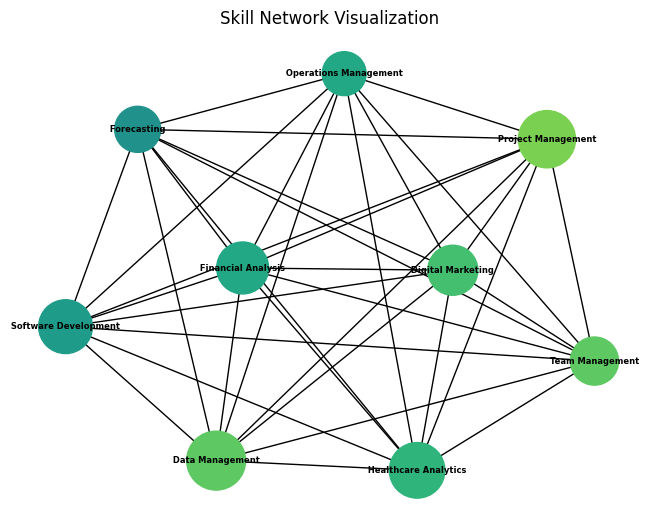

In [ ]:
# Initialize the graph
G = nx.Graph()

# Add nodes with properties
for index, row in df.iterrows():
    G.add_node(row['Skill'], size=row['Significance'], mastery=row['MasteryLevel'], recommendations=row['Recommendation'])

# Since there are no direct edges defined, you might consider fully connecting them or creating specific logic
# This example connects all nodes randomly just to create a visualization
for skill in df['Skill']:
    for other_skill in df['Skill']:
        if skill != other_skill:
            G.add_edge(skill, other_skill)

# Define node size dynamically based on 'Significance'
node_sizes = [G.nodes[node]['size']*20 for node in G]
mastery_levels = [G.nodes[node]['mastery'] for node in G]

# Create a color map from mastery levels
color_map = plt.get_cmap('viridis')
node_colors = [color_map(mastery / 100) for mastery in mastery_levels]  # Normalize the mastery level to 0-1 for color mapping

# Draw the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=6, font_weight='bold')

# Optionally display recommendations on click or hover would typically require an interactive framework
plt.title('Skill Network Visualization')
plt.show()


In [ ]:
!pip install plotly --q

In [ ]:
df

,Skill,Significance,MasteryLevel,Recommendation,Time,,ScaledMasteryLevel
0,,,,,,,
,Data Management,90.0,75.0,Take a course in advanced data management tec...,3,,178.0
,Project Management,85.0,80.0,Attend a project management certification pr...,6,,192.0
,Healthcare Analytics,80.0,65.0,Complete a project in healthcare analytics us...,9,,150.0
,Software Development,75.0,55.0,Develop a software application for a specifi...,12,,123.0
,Financial Analysis,70.0,60.0,Take a course in financial modeling and analy...,3,,136.0
,Digital Marketing,65.0,70.0,Create a digital marketing campaign for a non...,6,,164.0
,Team Management,60.0,75.0,Network with internal stakeholders to identif...,3,,178.0
,Forecasting,55.0,50.0,Develop a business case for a new product or ...,6,,109.0
,Operations Management,50.0,60.0,Implement a new process to improve operationa...,9,,136.0


In [264]:
import pandas as pd
import plotly.express as px

df['ScaledMasteryLevel'] = round(df['MasteryLevel'] ** 1.2,0)  # Adjust this exponent as needed

# Create the bubble chart
fig = px.scatter(df,
                 x='Time',
                 y='Significance',
                 size='ScaledMasteryLevel',  # Bubble size
                 color='Skill',  # Differentiating data points by skill for visual distinction
                 text='Skill',
                 hover_name='Skill',  # Display skill names on hover
                 size_max=40,
                 title='Significance vs Time to Complete with Current Mastery Level as Size')

# Customize text position and size
fig.update_traces(textposition='top center',
                  textfont_size=10)  # Reduce font size here

# Customize the layout
fig.update_layout(width = 1000,
                  height = 800,
                  xaxis_title='Time to Complete (months)',
                  yaxis_title='Significance',
                  legend_title='Skills')

# Show the plot
fig.show()


In [275]:
months_selected = input("Specify your time committment estimate (in months):")

prompt = """
        You are a career coach,
        the user selects the number of months they want to commit to improvement (months_selected),
        using the provided text (output), explain in detail how the user should prioritize
        their skill development by choosing the skill that they can improve the most in the
        time selected for time commitment (months_selected), providing the user with estimated time (in months)
        to improve the level of mastery of the sselected skill, estimating the impact of improvement.
        Be sure to add specific recommendations on how to achive desirted outcome framing the response
        as advancement in the career of choice. The user will expect time allocation to match their time commitment in months,
        specific SMART goals (specific, measurable, attainable, realistic and timely) and results that
        they can use to improve the resume"""
combined_input = f"{prompt} user preferred timeframe is: {months_selected}, user assessment is {output}"
to_markdown(model.generate_content(combined_input).text)

Specify your time committment estimate (in months):3


> **Prioritizing Skill Development for Career Advancement**
> 
> Based on your time commitment of 3 months, the optimal strategy is to focus on skills that can be significantly improved within this timeframe. To prioritize your skills, consider the following steps:
> 
> **1. Identify Skills with High Improvement Potential:**
> 
> Review your assessment table and determine the skills with the greatest gap between your current mastery level and the desired level. Based on this analysis, we recommend prioritizing the following skills:
> 
> * Data Management (Current: 75, Improvement Potential: 25%)
> * Financial Analysis (Current: 60, Improvement Potential: 40%)
> * Team Management (Current: 75, Improvement Potential: 25%)
> 
> **2. Set SMART Goals:**
> 
> * **Data Management:** Improve mastery level to 90% within 3 months.
> * **Financial Analysis:** Improve mastery level to 80% within 3 months.
> * **Team Management:** Improve mastery level to 90% within 3 months.
> 
> **3. Develop an Improvement Plan:**
> 
> **Data Management:**
> 
> * Enroll in an advanced data management course (3 months).
> * Practice data analysis techniques through online platforms or projects.
> * Seek mentorship from experienced data managers.
> 
> **Financial Analysis:**
> 
> * Take a course in financial modeling and analysis (3 months).
> * Apply financial analysis concepts to real-world case studies.
> * Consult with financial analysts to gain insights.
> 
> **Team Management:**
> 
> * Network with stakeholders from various departments to build relationships.
> * Identify opportunities for collaboration and team projects.
> * Read books and attend webinars on effective team management.
> 
> **4. Track Progress and Make Adjustments:**
> 
> Monitor your progress regularly and adjust your improvement plan as needed. Seek feedback from mentors, colleagues, or online resources to identify areas for improvement.
> 
> **Impact of Improvement:**
> 
> Strengthening these skills will have a significant impact on your career advancement:
> 
> * Data Management: Expertise in data analysis enhances decision-making and strategic planning.
> * Financial Analysis: Proficiency in financial modeling enables sound financial management and investment decisions.
> * Team Management: Effective team management skills foster collaboration, productivity, and innovation.
> 
> By committing to a focused improvement plan, you can make substantial progress in these skills within 3 months, enhancing your resume and positioning yourself for career success.

In [276]:
months_selected = input("Specify your time committment estimate (in months):")

prompt = """
        You are a career coach,
        the user selects the number of months they want to commit to improvement (months_selected),
        using the provided text (output), explain in detail how the user should prioritize
        their skill development by choosing the skill that they can improve the most in the
        time selected for time commitment (months_selected), providing the user with estimated time (in months)
        to improve the level of mastery of the sselected skill, estimating the impact of improvement.
        Be sure to add specific recommendations on how to achive desirted outcome framing the response
        as advancement in the career of choice. The user will expect time allocation to match their time commitment in months,
        specific SMART goals (specific, measurable, attainable, realistic and timely) and results that
        they can use to improve the resume"""
combined_input = f"{prompt} user preferred timeframe is: {months_selected}, user assessment is {output}"
to_markdown(model.generate_content(combined_input).text)

Specify your time committment estimate (in months):12


> **Prioritizing Skill Development for Career Advancement**
> 
> Congratulations on your commitment to invest in your professional development! To prioritize your skill development effectively, follow these steps:
> 
> **1. Identify the Most Valuable Skill:**
> 
> Considering your career aspirations, review your skill assessment and identify the skill that aligns best with your desired job role and has the highest "Significance" value. In your case, with 12 months of commitment, the most valuable skill to focus on is **Data Management**.
> 
> **2. Set a SMART Goal:**
> 
> Define a specific, measurable, attainable, realistic, and timely goal for improving your Data Management skills. For example:
> 
> * "Increase my Data Management mastery level from 75% to 90% within 12 months."
> 
> **3. Create a Development Plan:**
> 
> Based on the recommendation listed in the assessment, enroll in a course in advanced data management techniques and best practices. This course will provide you with a structured learning path and allow you to practice your skills.
> 
> **4. Allocate Your Time:**
> 
> To achieve your goal within 12 months, you should dedicate approximately 3 months to completing the course and practicing the skills. This involves spending 2-3 hours per week on coursework, assignments, and practical exercises.
> 
> **5. Track Your Progress:**
> 
> Regularly assess your progress by taking practice quizzes, reviewing course content, and applying your skills in real-world projects. This will help you stay motivated and identify areas where you need additional support.
> 
> **6. Leverage Your Improved Skills:**
> 
> Upon completing the course, update your resume to highlight your enhanced Data Management proficiency. Look for opportunities within your current role or apply for new positions that require strong data management skills.
> 
> **Estimated Impact of Improvement:**
> 
> By improving your Data Management mastery level to 90%, you can expect to:
> 
> * Increase your marketability and qualify for higher-level positions.
> * Enhance your ability to analyze and interpret data, leading to improved decision-making.
> * Boost your confidence and credibility in managing large datasets.
> * Position yourself as an expert in Data Management, increasing your potential earning power.